# Noisy moons with Julia TDA

## Create the data set

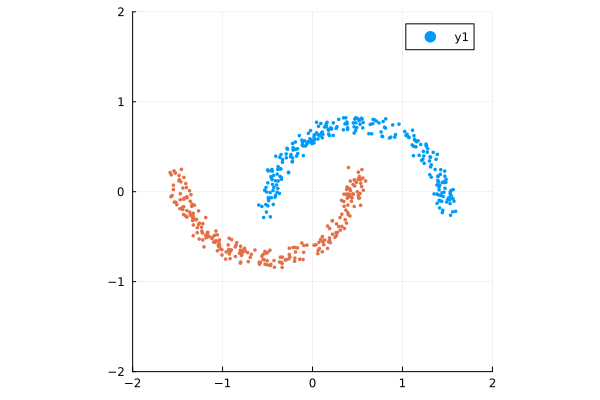

In [17]:
using Random, Plots
import ClusteringToMATo
rng = MersenneTwister(1234)
points, labels = ClusteringToMATo.noisy_moons(rng, 500)
options = (ms = 2, markerstrokewidth=0, aspect_ratio = 1, xlims=(-2,2), ylims=(-2,2))
scatter(points[1,:], points[2,:], c = labels; options...)

## Run the C++ program written by original authors

Save data set to file

In [18]:
using DelimitedFiles
open("noisy_moons.txt", "w") do io
    writedlm(io, points')
end

run the program and read the output persistence diagram 

Dimension: 2
Number of input points: 500
Number of clusters: 0


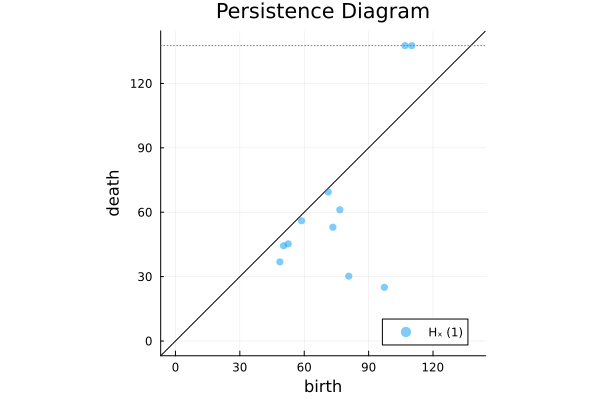

In [19]:
using PersistenceDiagrams
run(`./ToMATo/main_w_density noisy_moons.txt 30 0.2 1e20`)
pairs = readdlm("diagram.txt")
pairs[isinf.(pairs)] .*= -1
intervals = [PersistenceInterval(p...) for p in eachrow(pairs)]
pd = PersistenceDiagram(intervals)
plot(pd)

We can see the two clusters with infinite life and set the threshold to 200

Dimension: 2
Number of input points: 500
Number of clusters: 2


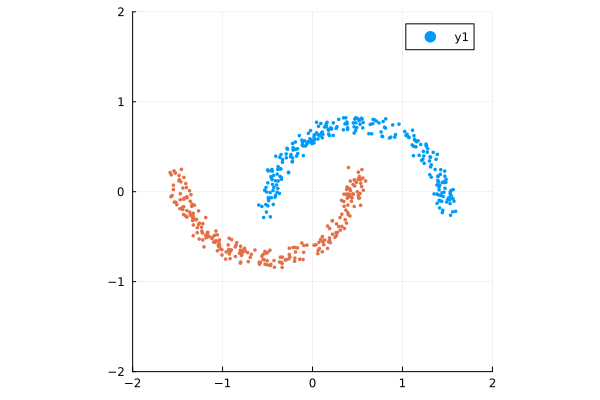

In [20]:
run(`./ToMATo/main_w_density noisy_moons.txt 30 0.2 90`)
clusters = vec(readdlm("clusters.txt"))
clusters[isnan.(clusters)] .= 0
scatter(points[1,:], points[2,:], color = Int.(clusters); options...)

## Use the JuliaTDA implementation

In [21]:
import Pkg
Pkg.add("Graphs")
Pkg.add(url="https://github.com/JuliaTDA/GeometricDatasets.jl")
Pkg.add(url="https://github.com/vituri/Quartomenter.jl")
Pkg.add(url="https://github.com/JuliaTDA/ToMATo.jl")

using ToMATo
import GeometricDatasets

   Resolving package versions...
    Updating `~/JuliaProjects/ClusteringToMaTo.jl/Project.toml`
  [86223c79] + Graphs v1.8.0
    Updating `~/JuliaProjects/ClusteringToMaTo.jl/Manifest.toml`
  [ec485272] + ArnoldiMethod v0.2.0
  [86223c79] + Graphs v1.8.0
  [d25df0c9] + Inflate v0.1.3
  [1914dd2f] + MacroTools v0.5.11
  [699a6c99] + SimpleTraits v0.9.4
  [8ba89e20] + Distributed
  [a63ad114] + Mmap
  [1a1011a3] + SharedArrays
    Updating git-repo `https://github.com/JuliaTDA/GeometricDatasets.jl`
   Resolving package versions...
   Installed PkgVersion ─ v0.3.3
    Updating WARNING: redefinition of constant PATH. This may fail, cause incorrect answers, or produce other errors.
┌ Error: Error watching manifest
│   exception =
│    cannot set type for global best_wrapper. It already has a value or is already set to a different type.
│    Stacktrace:
│     [1] top-level scope
│       @ ~/.julia/packages/JLLWrappers/pG9bm/src/toplevel_generators.jl:119
│    Revise evaluation error at /Use

Precompiling project...
  ✓ PkgVersion
┌ Error: Error watching manifest
│   exception =
│    cannot set type for global best_wrapper. It already has a value or is already set to a different type.
│    Stacktrace:
│     [1] top-level scope
│       @ ~/.julia/packages/JLLWrappers/pG9bm/src/toplevel_generators.jl:119
│    Revise evaluation error at /Users/navaro/.julia/packages/JLLWrappers/pG9bm/src/toplevel_generators.jl:119
│    
│    Stacktrace:
│     [1] methods_by_execution!(recurse::Any, methodinfo::Revise.CodeTrackingMethodInfo, docexprs::Dict{Module, Vector{Expr}}, mod::Module, ex::Expr; mode::Symbol, disablebp::Bool, always_rethrow::Bool, kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
│       @ Revise ~/.julia/packages/Revise/7HQ7u/src/lowered.jl:227
└ @ Revise ~/.julia/packages/Revise/7HQ7u/src/pkgs.jl:477
  ✓ TiffImages
  ✓ ImageIO
  ✓ Makie
  ✓ GeometricDatasets
  ✓ ClusteringToMATo
  6 dependencies successfully precompiled in 180 seconds. 254 already p

  [cbdf2221] + AlgebraOfGraphics v0.6.16
  [85a47980] + Dictionaries v0.3.25
  [f7f18e0c] + GLFW v3.4.1
  [38e38edf] + GLM v1.8.3
  [e9467ef8] + GLMakie v0.8.8
  [313cdc1a] + Indexing v1.1.1
  [4345ca2d] + Loess v0.6.2
  [7269a6da] + MeshIO v0.4.10
  [66fc600b] + ModernGL v1.1.7
  [46757867] + NetworkLayout v0.4.5
  [2dfb63ee] + PooledArrays v1.4.2
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.2
  [9853e363] + ToMATo v0.1.0 `https://github.com/JuliaTDA/ToMATo.jl#main`
  [0656b61e] + GLFW_jll v3.3.8+0
  [7e76a0d4] + Libglvnd_jll v1.6.0+0
  [935fb764] + Xorg_libXcursor_jll v1.2.0+4
  [d091e8ba] + Xorg_libXfixes_jll v5.0.3+4
  [a51aa0fd] + Xorg_libXi_jll v1.7.10+4
  [d1454406] + Xorg_libXinerama_jll v1.1.4+4
  [ec84b674] + Xorg_libXrandr_jll v1.5.2+4
Precompiling project...
┌ Error: Error watching manifest
│   exception =
│    cannot set type for global best_wrapper. It already has a value or is already set to a different type.
│    Stacktrace:
│     [1] top-level sc

In [22]:
g = proximity_graph(points, 0.2)
k = x -> exp(-(x / 2)^2)
ds = GeometricDatasets.Filters.density(points, kernel_function = X -> X .|> k |> sum)

500-element Vector{Float32}:
 0.7016719
 0.66423655
 0.7605092
 0.55907625
 0.7395044
 0.65879756
 0.56191194
 0.7714916
 0.7727524
 0.5544561
 0.54519844
 0.7639485
 0.7622907
 ⋮
 0.75019115
 0.5665026
 0.55364585
 0.76513624
 0.5945993
 0.7352779
 0.5196691
 0.7618351
 0.68359554
 0.6930445
 0.5573235
 0.7662404

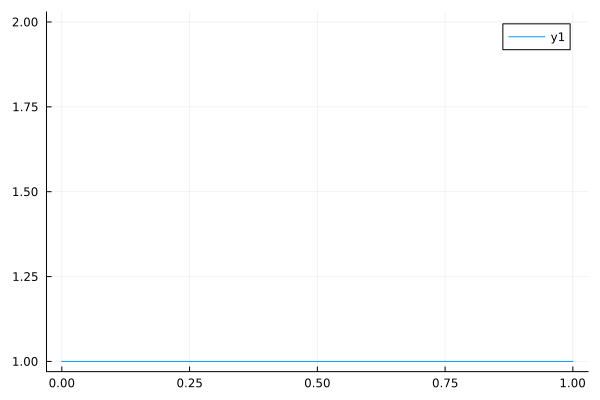

In [57]:
plot([0.0, 1.0], [1.0, 1.0])

In [60]:
import Graphs

function graph_plot(points, graph)
    p = scatter(points[1,:], points[2,:],  markerstrokewidth=0)
    for e in Graphs.edges(graph)
        x1, y1 = points[:,e.src]
        x2, y2 = points[:,e.dst]
        plot!(p, [x1, x2], [y1, y2], color = :black, lw = 0.5, alpha = 0.5, legend = false)
    end
    p
end

graph_plot (generic function with 2 methods)

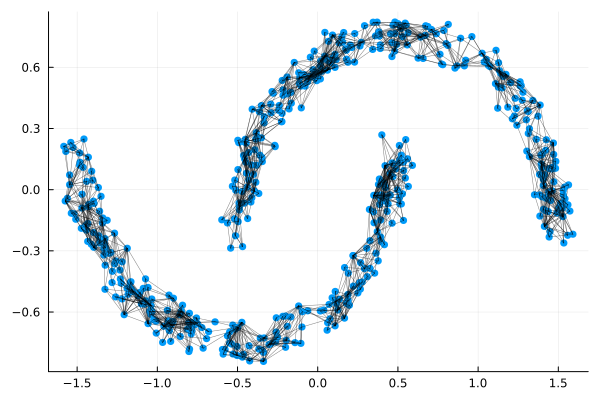

In [61]:
graph_plot(points, g)

In [62]:
clusters, births_and_deaths = tomato(points, g, ds, Inf)

([1, 2, 1, 2, 1, 2, 1, 2, 1, 2  …  1, 2, 1, 2, 1, 2, 1, 2, 1, 2], Dict{Int64, Vector{<:Real}}(192 => [0.6699835062026978, 0.6642365455627441], 297 => [0.7408482432365417, 0.7395043969154358], 465 => [0.7736690640449524, 0.7714739441871643], 133 => [0.6542710065841675, 0.6501832604408264], 399 => [0.7730015516281128, 0.7727524042129517], 430 => [0.738836407661438, 0.7360507249832153], 30 => [0.7618190050125122, 0.7604591846466064], 199 => [0.7012263536453247, 0.6944614052772522], 278 => [0.7433487772941589, 0.7360507249832153], 32 => [0.7717530131340027, Inf]…))

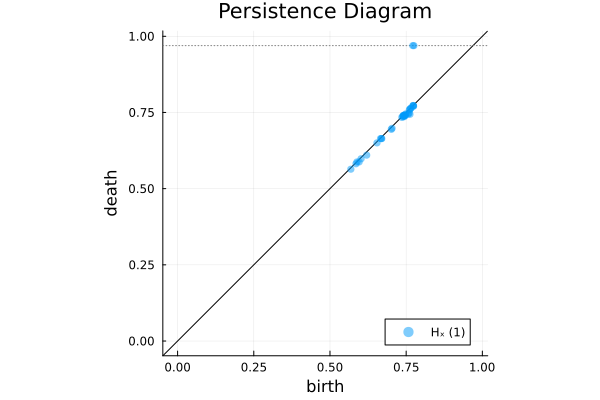

In [63]:
intervals = [PersistenceInterval(v...) for v in values(births_and_deaths)]
diagram = PersistenceDiagram(intervals)

plot(diagram)

In [64]:
clusters, births_and_deaths = tomato(points, g, ds, 0.1)

([1, 2, 1, 2, 1, 2, 1, 2, 1, 2  …  1, 2, 1, 2, 1, 2, 1, 2, 1, 2], Dict{Int64, Vector{<:Real}}(192 => [0.6699835062026978, 0.6642365455627441], 297 => [0.7408482432365417, 0.7395043969154358], 465 => [0.7736690640449524, 0.7714739441871643], 133 => [0.6542710065841675, 0.6501832604408264], 399 => [0.7730015516281128, 0.7727524042129517], 430 => [0.738836407661438, 0.7360507249832153], 30 => [0.7618190050125122, 0.7604591846466064], 199 => [0.7012263536453247, 0.6944614052772522], 278 => [0.7433487772941589, 0.7360507249832153], 32 => [0.7717530131340027, Inf]…))

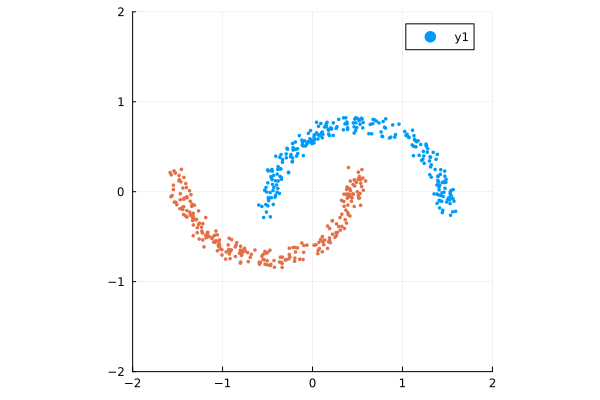

In [65]:
scatter(points[1,:], points[2,:], color = clusters; options...)